# HW Assignment 9
## Gal Dali

### Quantum Phase Estimation (QPE)

##### Goal: find (estimate) $\theta$

$ U | \psi \rangle = e^{2 \pi i \theta} | \psi \rangle $

$ \psi_0 = | 0 \rangle^{\otimes t}|\psi \rangle $

$ |\psi_1⟩ = (H^{\otimes t} \otimes  I)|\psi_0⟩ = \frac{1}{2^{\frac{t}{2}}}(|0⟩ + |1⟩)^{\otimes t}|\psi⟩ = \frac{1}{2^{t/2}}\sum_{j=0}^{2^t-1}|j⟩|\psi⟩. $

$ |\psi_2⟩ = U_C|\psi_1⟩ = \left( \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} e^{2\pi i \theta k} |k⟩ \right) \otimes |\psi⟩, $
$ \text{ (I used the eigen-value equation, $U_c$ is the controlled $U$ gate)} $

$ |\tilde{\psi}_3\rangle = QFT_{2^t}^{\dagger}|\tilde{\psi}_2\rangle. $


#### Problem 1

In [263]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import warnings

In [264]:
def create_qpe_circuit(num_of_qubits, theta, operator='T'):
    qc = QuantumCircuit(num_of_qubits + 1, num_of_qubits)  # 2 registers
    # psi_0

    for i in range(num_of_qubits): qc.h(i)
    qc.x(num_of_qubits)
    # psi_1

    for i in range(num_of_qubits):
        for _ in range(2 ** i):
            if operator == 'T':
                qc.cp(theta, i, num_of_qubits)
            elif operator == 'X':
                qc.cx(i, num_of_qubits)
            elif operator == 'Y':
                qc.cy(i, num_of_qubits)
    # psi_2

    qc.barrier()

    QFT_dagger = QFT(num_of_qubits).inverse()
    qc.append(QFT_dagger, range(num_of_qubits))
    # psi_3

    qc.barrier()

    for i in range(num_of_qubits): qc.measure(i, i)

    return qc


warnings.filterwarnings("ignore", category=DeprecationWarning)


def produce_histogram(qc, print_flag=True):
    # should use the newer 'StatevectorSampler'.
    results = Sampler().run(qc).result()
    statistics = results.quasi_dists[0].binary_probabilities()

    # print the most probable state
    if print_flag: print(max(statistics, key=statistics.get))
    display(plot_histogram(statistics))

#### 1.a

$ \theta = \frac{1}{8} \text{ So since we measure $|2^t\theta\rangle$, we should get $|2^3\theta\rangle = |\frac{2^3}{8}\rangle = |1\rangle = |001\rangle$} $

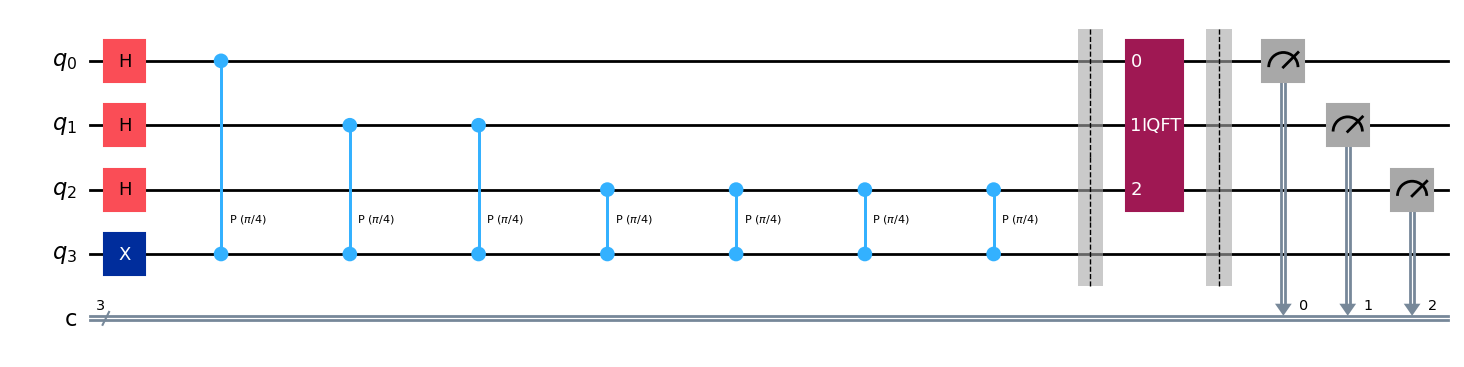

In [265]:
t = 3
theta = np.pi / 4

qc = create_qpe_circuit(t, theta)
qc.draw(output='mpl')

#### 1.b

001


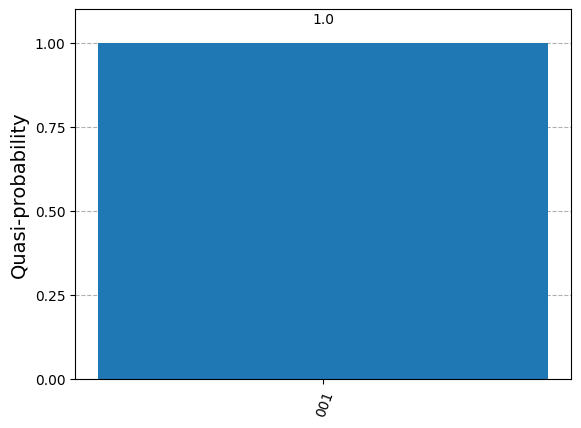

In [266]:
produce_histogram(qc)

We get that the answer is $001_b$ = 1 in decimal just as we expected!

#### Problem 2


$ \hat P = \begin{pmatrix} 1 & 0 \\ 0 & e^{i \lambda} \end{pmatrix} $

$ \lambda = \frac{2 \pi i}{3}, \theta = \frac{1}{3} => \text{ we will never get an exact answer since we need infinite number of bits to represent one third in binary. (3 is not a power of 2)} $


In [267]:
theta = 2 * np.pi / 3

#### 2.a

$ |2^t\theta\rangle = |\frac{8}{3}\rangle \approx |2.66666667\rangle = |10.10101010101...\rangle \text{. Rounding up we obtain: |11\rangle.} $

$ \text{Since we use only 3 qubits, we should measure: } |011\rangle \text{, which is 3 in decimal.} $

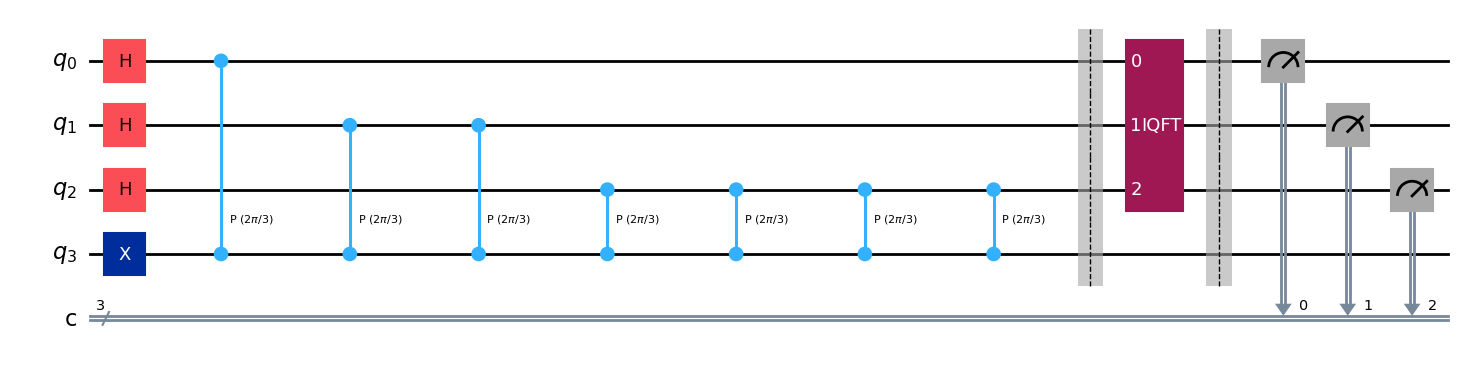

In [268]:
t = 3
qc = create_qpe_circuit(t, theta)
qc.draw(output='mpl')

011


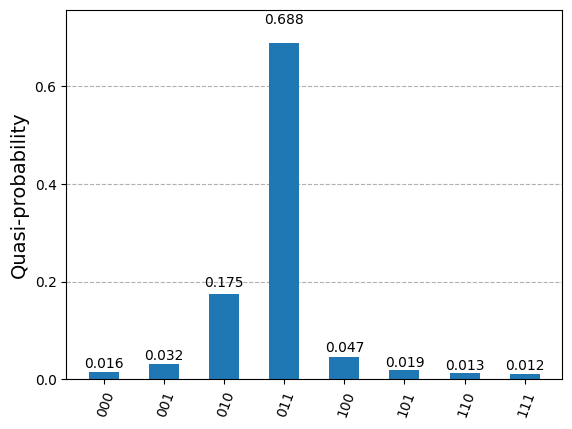

In [269]:
produce_histogram(qc)

#### 2.b

$ |2^t\theta\rangle = |\frac{32}{3}\rangle \approx |10.6666666667\rangle = |1010.10101010101...\rangle \text{. Rounding up we obtain: } |1011\rangle $

$ \text{ Since we use only 5 qubits, we should measure: } |01011\rangle \text{ which is 11 in decimal.} $

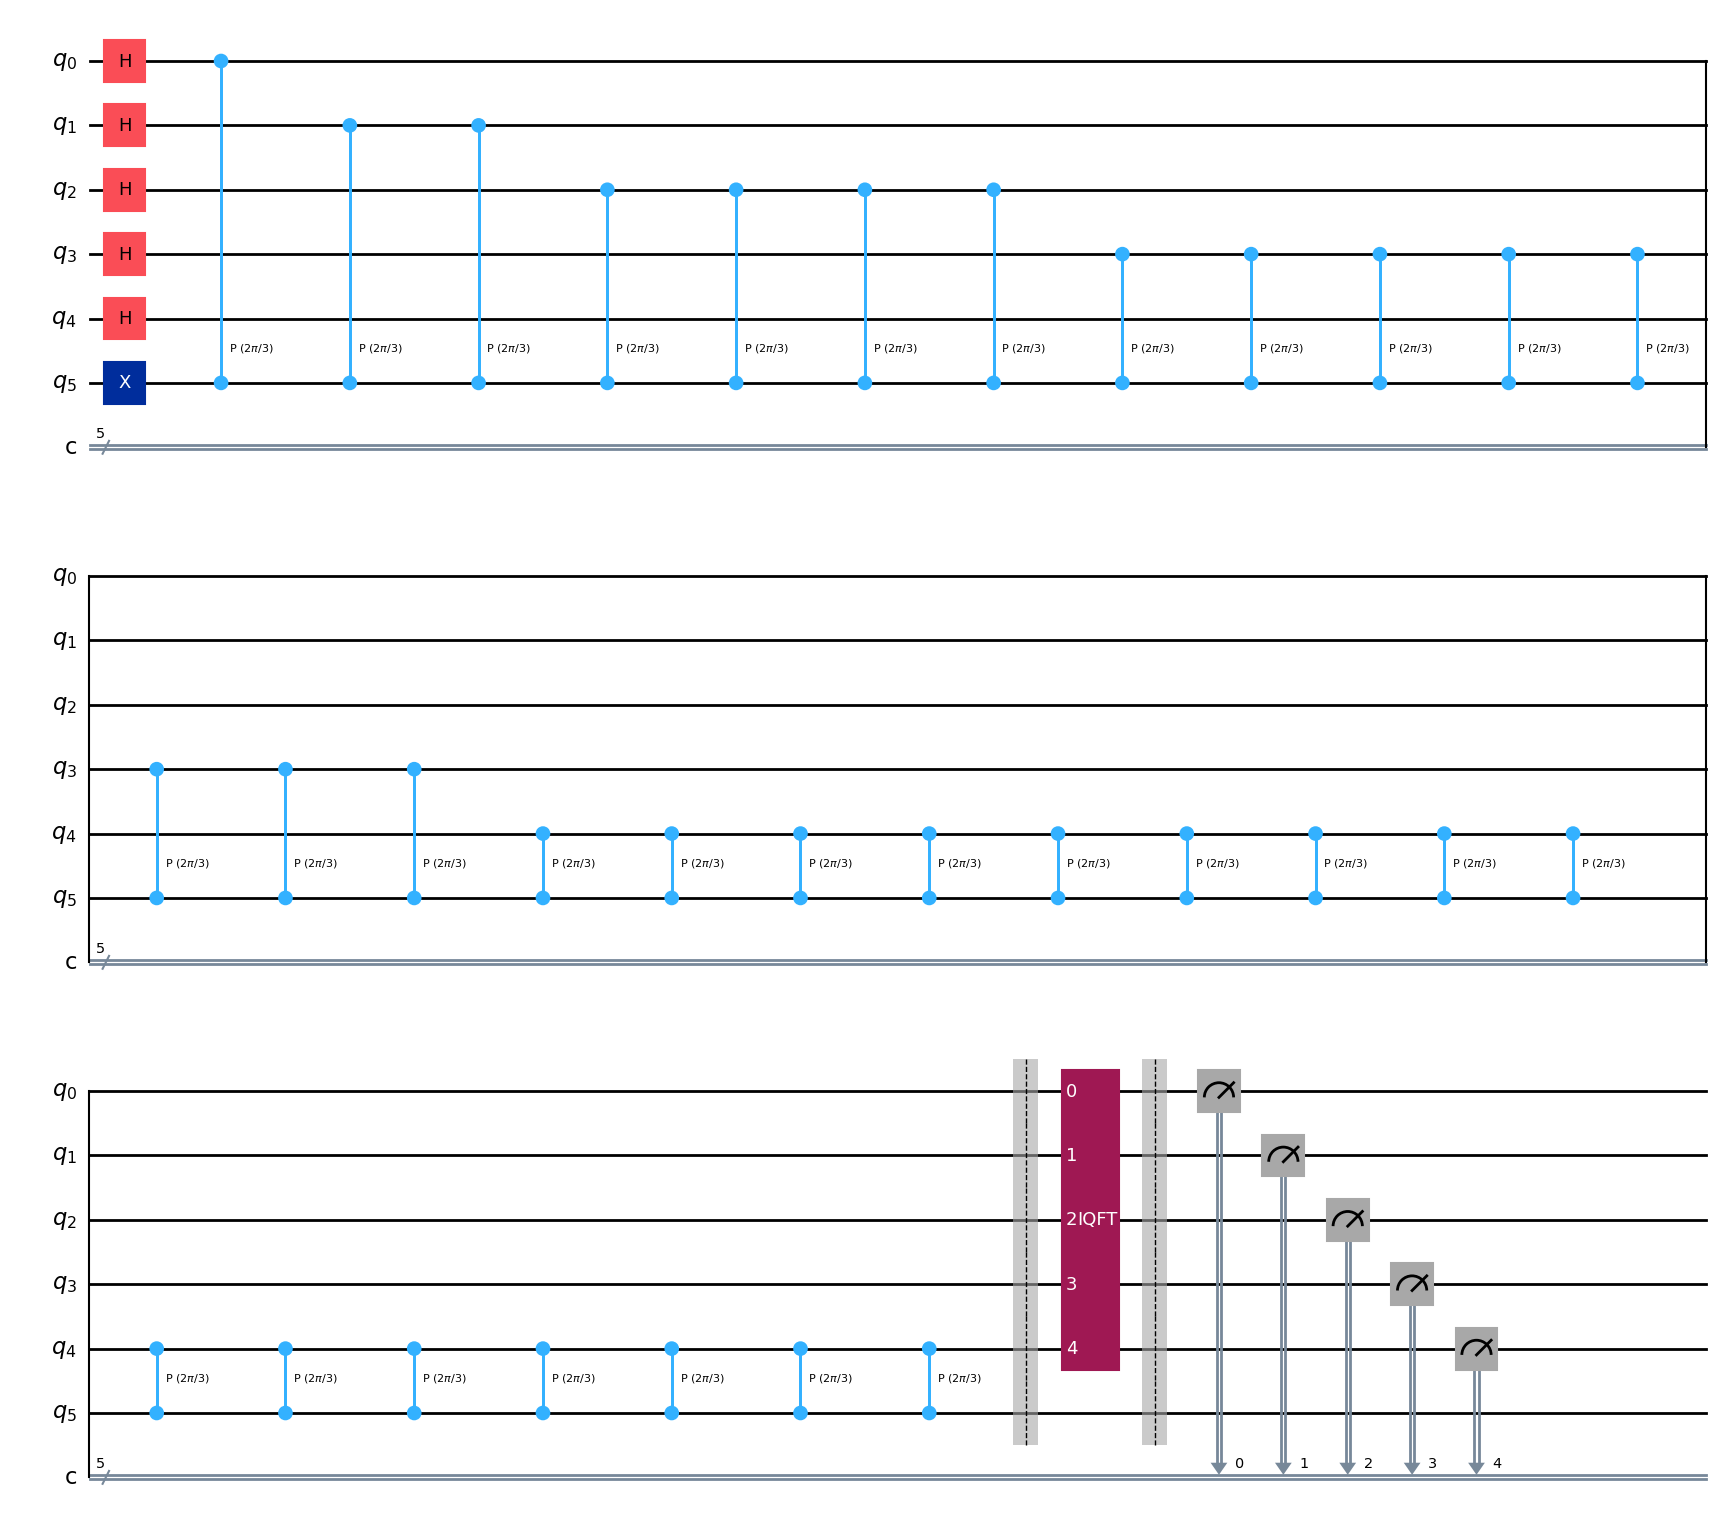

In [270]:
t = 5
qc = create_qpe_circuit(t, theta)
qc.draw(output='mpl')

01011


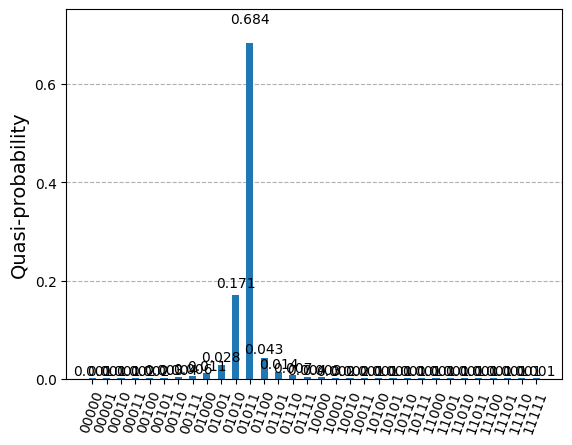

In [271]:
produce_histogram(qc)

#### Problem 3

#### 3.a

$ \hat U = \hat S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & e^{2\pi i \cdot \frac{1}{4}} \end{pmatrix} ==> \theta = \frac{1}{4}. $
$ \hat S \text{ is the phase gate.} $

$ |2^t\theta\rangle = |\frac{4}{4}\rangle = |1\rangle = |01\rangle $

In [272]:
theta = 2 * np.pi / 4

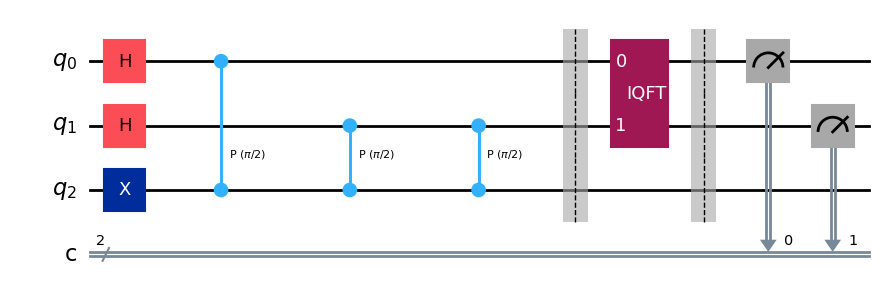

In [273]:
t = 2
qc = create_qpe_circuit(t, theta)
qc.draw(output='mpl')

01


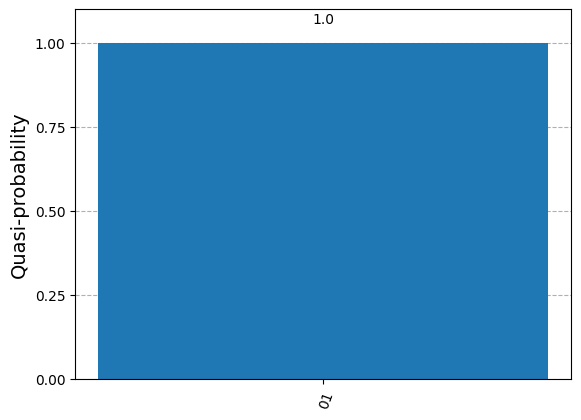

In [274]:
produce_histogram(qc)

#### 3.b

$ \hat U = \hat X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $

$ \hat X \text{ is the $\sigma_x$ Pauli operator.} $


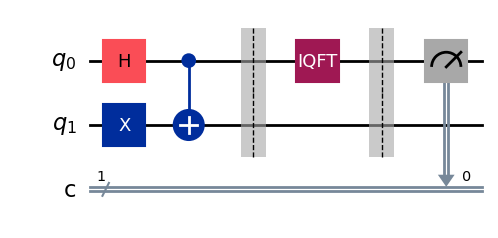

In [275]:
t = 1
qc = create_qpe_circuit(t, 0, 'X')
qc.draw(output='mpl')

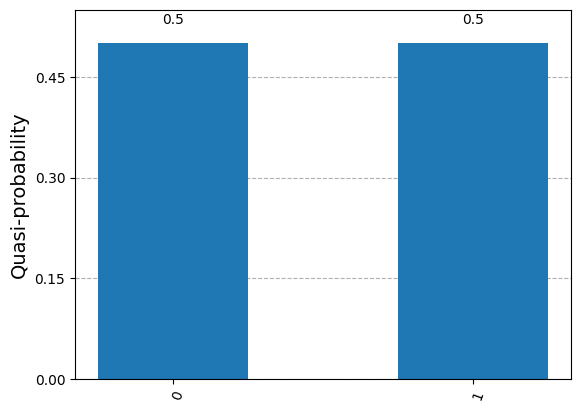

In [276]:
produce_histogram(qc, print_flag=False)

#### 3.c

$ \hat U = \hat Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $

$ \hat Y \text{ is the $\sigma_y$ Pauli operator.} $


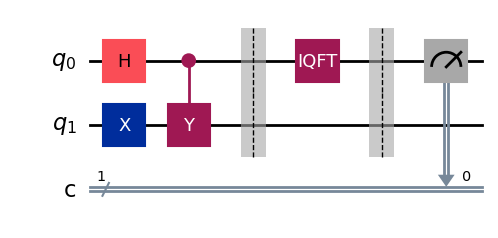

In [277]:
t = 1
qc = create_qpe_circuit(t, 0, 'Y')
qc.draw(output='mpl')

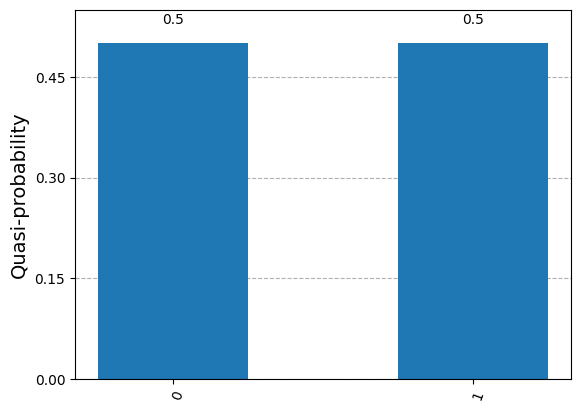

In [278]:
produce_histogram(qc, print_flag=False)